In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
dirName = "TCGA_LAML/"
filename = dirName + "TCGA.LAML.muse"
file = open(dirName+"TCGA.LAML.muse", 'r')

In [3]:
df = pd.read_table(file, skiprows= 5)

In [4]:
df

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,CADM3,57863,BI,GRCh38,chr1,159193525,159193525,+,Missense_Mutation,SNP,...,PASS,AGCCCGGCTCA,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1317644,True,Valid
1,MAP2,4133,BI,GRCh38,chr2,209693458,209693458,+,Missense_Mutation,SNP,...,PASS,CCAGTGGACAG,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1318115,True,Valid
2,MYLK,4638,BI,GRCh38,chr3,123708800,123708800,+,Missense_Mutation,SNP,...,PASS,ACAAAGGCTGT,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1318734,True,Valid
3,SULT1B1,27284,BI,GRCh38,chr4,69734168,69734168,+,Missense_Mutation,SNP,...,bSeq,ATATTCTTCCC,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1319319,True,Valid
4,BMPER,168667,BI,GRCh38,chr7,33905662,33905662,+,Missense_Mutation,SNP,...,PASS,GCCGCCGCTCG,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1318986,True,Valid
5,DRD2,1813,BI,GRCh38,chr11,113410919,113410919,+,Splice_Region,SNP,...,PASS,AACACGCCTGG,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1317394,True,Valid
6,PKP2,5318,BI,GRCh38,chr12,32843190,32843190,+,Missense_Mutation,SNP,...,PASS,GTTGGTCAGGC,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1492889,False,Unknown
7,CEP290,80184,BI,GRCh38,chr12,88089108,88089108,+,Missense_Mutation,SNP,...,PASS,CCAATGTTTTG,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1317958,True,Valid
8,FCGBP,8857,BI,GRCh38,chr19,39927528,39927528,+,Silent,SNP,...,PASS,TGGTTGTAGGT,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,NaN,True,Valid
9,PADI2,11240,BI,GRCh38,chr1,17092478,17092478,+,Silent,SNP,...,PASS,CCGGCGGGGAG,76aa8461-e206-4af8-8737-ccc7dfc49d87,28a524fc-e762-4d1b-896e-dc80129cbcae,1302716a-80f6-4e3c-8c7c-0e8ee347f011,53fad992-1808-47bf-a59a-307c7e5fbed8,wga_pair,COSM1317614;COSM4877634,True,Valid


In [5]:
df.shape

(3180, 120)

In [6]:
list(df)

['Hugo_Symbol',
 'Entrez_Gene_Id',
 'Center',
 'NCBI_Build',
 'Chromosome',
 'Start_Position',
 'End_Position',
 'Strand',
 'Variant_Classification',
 'Variant_Type',
 'Reference_Allele',
 'Tumor_Seq_Allele1',
 'Tumor_Seq_Allele2',
 'dbSNP_RS',
 'dbSNP_Val_Status',
 'Tumor_Sample_Barcode',
 'Matched_Norm_Sample_Barcode',
 'Match_Norm_Seq_Allele1',
 'Match_Norm_Seq_Allele2',
 'Tumor_Validation_Allele1',
 'Tumor_Validation_Allele2',
 'Match_Norm_Validation_Allele1',
 'Match_Norm_Validation_Allele2',
 'Verification_Status',
 'Validation_Status',
 'Mutation_Status',
 'Sequencing_Phase',
 'Sequence_Source',
 'Validation_Method',
 'Score',
 'BAM_File',
 'Sequencer',
 'Tumor_Sample_UUID',
 'Matched_Norm_Sample_UUID',
 'HGVSc',
 'HGVSp',
 'HGVSp_Short',
 'Transcript_ID',
 'Exon_Number',
 't_depth',
 't_ref_count',
 't_alt_count',
 'n_depth',
 'n_ref_count',
 'n_alt_count',
 'all_effects',
 'Allele',
 'Gene',
 'Feature',
 'Feature_type',
 'One_Consequence',
 'Consequence',
 'cDNA_position',
 'C

In [8]:
#Get the case ids
with open(filename) as f:
    for _ in range(4):
        next(f)
    case_ids = f.readline()
case_ids = case_ids.replace('\n','')
case_ids = case_ids.replace('\t','')
case_ids = case_ids.split(' ', maxsplit=1)[1]
case_ids = case_ids.split(',')
print(case_ids)

['TCGA-AB-2802-03B-01W-0728-08', 'TCGA-AB-2803-03B-01W-0728-08', 'TCGA-AB-2804-03B-01W-0728-08', 'TCGA-AB-2805-03B-01W-0728-08', 'TCGA-AB-2806-03B-01W-0728-08', 'TCGA-AB-2807-03B-01W-0728-08', 'TCGA-AB-2808-03B-01W-0728-08', 'TCGA-AB-2809-03D-01W-0755-09', 'TCGA-AB-2810-03B-01W-0728-08', 'TCGA-AB-2811-03B-01W-0728-08', 'TCGA-AB-2812-03B-01W-0728-08', 'TCGA-AB-2813-03B-01W-0728-08', 'TCGA-AB-2814-03D-01W-0755-09', 'TCGA-AB-2815-03B-01W-0728-08', 'TCGA-AB-2816-03B-01W-0728-08', 'TCGA-AB-2817-03B-01W-0728-08', 'TCGA-AB-2818-03B-01W-0728-08', 'TCGA-AB-2819-03B-01W-0728-08', 'TCGA-AB-2820-03B-01W-0728-08', 'TCGA-AB-2821-03B-01W-0728-08', 'TCGA-AB-2822-03D-01W-0755-09', 'TCGA-AB-2824-03B-01W-0728-08', 'TCGA-AB-2825-03D-01W-0755-09', 'TCGA-AB-2826-03B-01W-0728-08', 'TCGA-AB-2827-03B-01W-0728-08', 'TCGA-AB-2828-03B-01W-0728-08', 'TCGA-AB-2829-03B-01W-0728-08', 'TCGA-AB-2830-03B-01W-0728-08', 'TCGA-AB-2831-03A-01W-0726-08', 'TCGA-AB-2833-03B-01W-0728-08', 'TCGA-AB-2834-03B-01W-0728-08', 'TCGA-A

In [9]:
mut_count = {}
for case_id in case_ids:
    mut_count[case_id] = df[df['case_id'] == case_id].shape
mut_count

{'TCGA-AB-2802-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2803-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2804-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2805-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2806-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2807-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2808-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2809-03D-01W-0755-09': (0, 120),
 'TCGA-AB-2810-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2811-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2812-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2813-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2814-03D-01W-0755-09': (0, 120),
 'TCGA-AB-2815-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2816-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2817-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2818-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2819-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2820-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2821-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2822-03D-01W-0755-09': (0, 120),
 'TCGA-AB-2824-03B-01W-0728-08': (0, 120),
 'TCGA-AB-2825-03D-01W-0755-09': (0, 120),
 'TCGA-AB-2

In [10]:
mutation_flavors = df['Variant_Classification'].unique()
mutation_types = {}
for mut in mutation_flavors:
    mutation_types[mut] = df[df['Variant_Classification'] == mut].shape[0]
mutation_types

{"3'Flank": 15,
 "3'UTR": 90,
 "5'Flank": 14,
 "5'UTR": 38,
 'Intron': 105,
 'Missense_Mutation': 1892,
 'Nonsense_Mutation': 118,
 'Nonstop_Mutation': 3,
 'RNA': 66,
 'Silent': 744,
 'Splice_Region': 37,
 'Splice_Site': 56,
 'Translation_Start_Site': 2}

In [11]:
df[df['case_id'] == case_ids[0]]

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status


In [12]:
df['case_id']

0       ffc915b8-cacd-4974-a040-ee496f0efc0e
1       ffc915b8-cacd-4974-a040-ee496f0efc0e
2       ffc915b8-cacd-4974-a040-ee496f0efc0e
3       ffc915b8-cacd-4974-a040-ee496f0efc0e
4       ffc915b8-cacd-4974-a040-ee496f0efc0e
5       ffc915b8-cacd-4974-a040-ee496f0efc0e
6       ffc915b8-cacd-4974-a040-ee496f0efc0e
7       ffc915b8-cacd-4974-a040-ee496f0efc0e
8       ffc915b8-cacd-4974-a040-ee496f0efc0e
9       53fad992-1808-47bf-a59a-307c7e5fbed8
10      53fad992-1808-47bf-a59a-307c7e5fbed8
11      53fad992-1808-47bf-a59a-307c7e5fbed8
12      53fad992-1808-47bf-a59a-307c7e5fbed8
13      53fad992-1808-47bf-a59a-307c7e5fbed8
14      53fad992-1808-47bf-a59a-307c7e5fbed8
15      53fad992-1808-47bf-a59a-307c7e5fbed8
16      53fad992-1808-47bf-a59a-307c7e5fbed8
17      53fad992-1808-47bf-a59a-307c7e5fbed8
18      53fad992-1808-47bf-a59a-307c7e5fbed8
19      53fad992-1808-47bf-a59a-307c7e5fbed8
20      53fad992-1808-47bf-a59a-307c7e5fbed8
21      53fad992-1808-47bf-a59a-307c7e5fbed8
22      53

In [13]:
print("muse")
muse_df = pd.read_table(dirName+'TCGA.LAML.muse', skiprows= 5)
print("mutect")
mutect_df = pd.read_table(dirName+'TCGA.LAML.mutect', skiprows= 5)
print("somaticsniper")
somaticsniper_df = pd.read_table(dirName+'TCGA.LAML.somaticsniper', skiprows= 5)
print("varscan")
varscan_df = pd.read_table(dirName+'TCGA.LAML.varscan', skiprows= 5)

muse
mutect


/home/ubuntu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


somaticsniper
varscan


In [14]:
muse_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,CADM3,57863,BI,GRCh38,chr1,159193525,159193525,+,Missense_Mutation,SNP,...,PASS,AGCCCGGCTCA,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1317644,True,Valid
1,MAP2,4133,BI,GRCh38,chr2,209693458,209693458,+,Missense_Mutation,SNP,...,PASS,CCAGTGGACAG,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1318115,True,Valid
2,MYLK,4638,BI,GRCh38,chr3,123708800,123708800,+,Missense_Mutation,SNP,...,PASS,ACAAAGGCTGT,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1318734,True,Valid
3,SULT1B1,27284,BI,GRCh38,chr4,69734168,69734168,+,Missense_Mutation,SNP,...,bSeq,ATATTCTTCCC,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1319319,True,Valid
4,BMPER,168667,BI,GRCh38,chr7,33905662,33905662,+,Missense_Mutation,SNP,...,PASS,GCCGCCGCTCG,5c2a7e12-cd14-491b-8ed3-f361dbf388f6,1ca9c5b4-66d2-4266-ba19-f2709c7cc25e,c8967e71-f144-4394-8251-2cbb5e2dc0d7,ffc915b8-cacd-4974-a040-ee496f0efc0e,wga_pair,COSM1318986,True,Valid


In [15]:
mutect_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,OR8B4,283162,WUGSC,GRCh38,chr11,124424661,124424661,+,Missense_Mutation,SNP,...,PASS,ACAGAGATCTA,2c6f9ca6-923f-4ed7-9846-bdfe28776650,bb47da9c-2365-4a64-909a-89d74c8159a7,6a1e64a7-aea3-4c2e-8f62-abfc94f35b62,b5cbd66f-948d-45a3-af3b-f17e2b35d85e,wga_pair,NaN,False,Unknown
1,CD4,920,WUGSC,GRCh38,chr12,6820166,6820166,+,3'UTR,SNP,...,PASS,TGGCTAGTGGT,2c6f9ca6-923f-4ed7-9846-bdfe28776650,bb47da9c-2365-4a64-909a-89d74c8159a7,6a1e64a7-aea3-4c2e-8f62-abfc94f35b62,b5cbd66f-948d-45a3-af3b-f17e2b35d85e,wga_pair,NaN,False,Unknown
2,CAPRIN2,65981,WUGSC,GRCh38,chr12,30753693,30753693,+,Nonsense_Mutation,SNP,...,alt_allele_in_normal,TAGACCACTCC,2c6f9ca6-923f-4ed7-9846-bdfe28776650,bb47da9c-2365-4a64-909a-89d74c8159a7,6a1e64a7-aea3-4c2e-8f62-abfc94f35b62,b5cbd66f-948d-45a3-af3b-f17e2b35d85e,wga_pair,NaN,False,Valid
3,CHRM5,1133,WUGSC,GRCh38,chr15,34064542,34064542,+,3'UTR,SNP,...,PASS,ATGCCAGGGGA,2c6f9ca6-923f-4ed7-9846-bdfe28776650,bb47da9c-2365-4a64-909a-89d74c8159a7,6a1e64a7-aea3-4c2e-8f62-abfc94f35b62,b5cbd66f-948d-45a3-af3b-f17e2b35d85e,wga_pair,NaN,False,Unknown
4,SCAMP5,192683,WUGSC,GRCh38,chr15,75018463,75018463,+,Silent,SNP,...,PASS,GGCTCGGCGGT,2c6f9ca6-923f-4ed7-9846-bdfe28776650,bb47da9c-2365-4a64-909a-89d74c8159a7,6a1e64a7-aea3-4c2e-8f62-abfc94f35b62,b5cbd66f-948d-45a3-af3b-f17e2b35d85e,wga_pair,NaN,False,Unknown


In [16]:
somaticsniper_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,ABCA4,24,BI,GRCh38,chr1,94031966,94031966,+,Missense_Mutation,SNP,...,PASS,CTGGGGTGTCT,7a925351-4788-4ab2-a8ee-840be66265df,052bcf45-4e0c-4022-a82e-edd4b65f50a4,0414fcbb-352d-41d6-a8cf-0d2f5eb7f3e4,c1f908ce-f6d5-4557-a4bf-956b71b8bf61,wga_pair,NaN,False,Unknown
1,GABRA4,2557,BI,GRCh38,chr4,46971197,46971197,+,Missense_Mutation,SNP,...,PASS,CTTCCGTCTGA,7a925351-4788-4ab2-a8ee-840be66265df,052bcf45-4e0c-4022-a82e-edd4b65f50a4,0414fcbb-352d-41d6-a8cf-0d2f5eb7f3e4,c1f908ce-f6d5-4557-a4bf-956b71b8bf61,wga_pair,COSM1319336,False,Valid
2,SNCAIP,9627,BI,GRCh38,chr5,122451113,122451113,+,Missense_Mutation,SNP,...,PASS,GCAGCGAACCA,7a925351-4788-4ab2-a8ee-840be66265df,052bcf45-4e0c-4022-a82e-edd4b65f50a4,0414fcbb-352d-41d6-a8cf-0d2f5eb7f3e4,c1f908ce-f6d5-4557-a4bf-956b71b8bf61,wga_pair,COSM1060089;COSM1060090,False,Valid
3,CDKL3,51265,BI,GRCh38,chr5,134304558,134304558,+,Missense_Mutation,SNP,...,PASS,CTTCTCCATTT,7a925351-4788-4ab2-a8ee-840be66265df,052bcf45-4e0c-4022-a82e-edd4b65f50a4,0414fcbb-352d-41d6-a8cf-0d2f5eb7f3e4,c1f908ce-f6d5-4557-a4bf-956b71b8bf61,wga_pair,COSM4527491;COSM4527492;COSM4527493,True,Unknown
4,MINPP1,9562,BI,GRCh38,chr10,87508442,87508442,+,Silent,SNP,...,ssc40,TATCACGTGGA,7a925351-4788-4ab2-a8ee-840be66265df,052bcf45-4e0c-4022-a82e-edd4b65f50a4,0414fcbb-352d-41d6-a8cf-0d2f5eb7f3e4,c1f908ce-f6d5-4557-a4bf-956b71b8bf61,wga_pair,COSM1317419,False,Valid


In [17]:
varscan_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,TEKT4,150483,BI,GRCh38,chr2,94876716,94876716,+,Missense_Mutation,SNP,...,PASS,AGTGCATGGCC,a9ca7bb9-6647-4df0-a7df-0fa6c4ca788a,c9770955-d187-4e33-8876-fd5c5f733699,10c182d0-5dfa-488d-b077-5669948979ad,7cf64c74-47e6-4913-b91b-25198e36b7c8,wga_pair,COSM1318873,True,Valid
1,TKTL2,84076,BI,GRCh38,chr4,163473615,163473615,+,Silent,SNP,...,PASS,CACGACGTGAG,a9ca7bb9-6647-4df0-a7df-0fa6c4ca788a,c9770955-d187-4e33-8876-fd5c5f733699,10c182d0-5dfa-488d-b077-5669948979ad,7cf64c74-47e6-4913-b91b-25198e36b7c8,wga_pair,COSM1319365,True,Unknown
2,MIR8078,102466878,BI,GRCh38,chr18,109358,109358,+,3'Flank,SNP,...,PASS,CATTGTGACAT,a9ca7bb9-6647-4df0-a7df-0fa6c4ca788a,c9770955-d187-4e33-8876-fd5c5f733699,10c182d0-5dfa-488d-b077-5669948979ad,7cf64c74-47e6-4913-b91b-25198e36b7c8,wga_pair,NaN,False,Unknown
3,FLT3,2322,BI,GRCh38,chr13,28028203,28028203,+,Missense_Mutation,SNP,...,PASS,AGCAGGTTCAC,ab858233-b20c-4f50-b04e-10844986b899,b5decedf-7194-4903-8396-047a7f304702,6771bd98-9c21-4f4c-91ed-fdbab6eec470,d6ef326a-e3c6-42ad-84b9-3f7f07313101,wga_pair,COSM303886,False,Unknown
4,TMEM119,338773,BI,GRCh38,chr12,108592157,108592157,+,Frame_Shift_Del,DEL,...,PASS,GATGGGCCCCCC,9fa37bc9-c25d-4ff8-9235-69f37eb3b78f,06a38eab-fef0-4101-a7bd-13fa5afd7e28,50566fca-4c4c-4482-8b95-f0ea767b25cd,e54de1c4-6cdc-4106-ab5d-1d7c745e690f,wga_pair,NaN,False,Unknown


First, agregate a list of all of the case ids

In [18]:
dataframes = [muse_df, mutect_df, somaticsniper_df, varscan_df]
case_ids = []
for dataframe in tqdm(dataframes):
    for case_id in dataframe['case_id']:
        if case_id not in case_ids:
            case_ids.append(case_id)
    
    

100%|██████████| 4/4 [00:00<00:00, 134.05it/s]


In [19]:
len(case_ids)

144

In [20]:
chromosomes = varscan_df.Chromosome.unique() 
chromosomes = sorted(chromosomes)

Sumarise how many mutations are on each chromosome for each scan type

In [21]:
chromosome_count = {}
for chromosome in tqdm(chromosomes):
    muse_count = muse_df[muse_df["Chromosome"] == chromosome].shape[0]
    mutect_count = mutect_df[mutect_df["Chromosome"] == chromosome].shape[0]
    somaticsniper_count = somaticsniper_df[somaticsniper_df["Chromosome"] == chromosome].shape[0]
    varscan_count = varscan_df[varscan_df["Chromosome"] == chromosome].shape[0]
    chromosome_count[chromosome] = [muse_count, mutect_count, somaticsniper_count, varscan_count]

100%|██████████| 24/24 [00:00<00:00, 118.63it/s]


In [22]:
chromosome_count

{'chr1': [334, 1018, 264, 399],
 'chr10': [115, 411, 105, 154],
 'chr11': [199, 610, 175, 253],
 'chr12': [176, 529, 139, 197],
 'chr13': [49, 182, 60, 73],
 'chr14': [92, 325, 71, 115],
 'chr15': [139, 336, 116, 160],
 'chr16': [112, 330, 91, 140],
 'chr17': [211, 564, 156, 252],
 'chr18': [39, 142, 42, 64],
 'chr19': [231, 679, 181, 314],
 'chr2': [222, 728, 231, 291],
 'chr20': [77, 213, 57, 92],
 'chr21': [33, 100, 34, 45],
 'chr22': [44, 163, 41, 72],
 'chr3': [179, 584, 154, 234],
 'chr4': [110, 380, 101, 164],
 'chr5': [136, 459, 124, 180],
 'chr6': [160, 549, 155, 226],
 'chr7': [152, 455, 124, 210],
 'chr8': [92, 308, 94, 127],
 'chr9': [116, 363, 90, 145],
 'chrX': [160, 466, 141, 205],
 'chrY': [2, 11, 3, 6]}

In [23]:
chromosomes = ['chr1',
               'chr2',
               'chr3',
               'chr4',
               'chr5',
               'chr6',
               'chr7',
               'chr8',
               'chr9',
               'chr10',
               'chr11',
               'chr12',
               'chr13',
               'chr14',
               'chr15',
               'chr16',
               'chr17',
               'chr18',
               'chr19',
               'chr20',
               'chr21',
               'chr22',
               'chrX',
               'chrY']

100%|██████████| 24/24 [00:00<00:00, 131.19it/s]


Text(0.5,0.98,'Varients Detected per Chromosome')

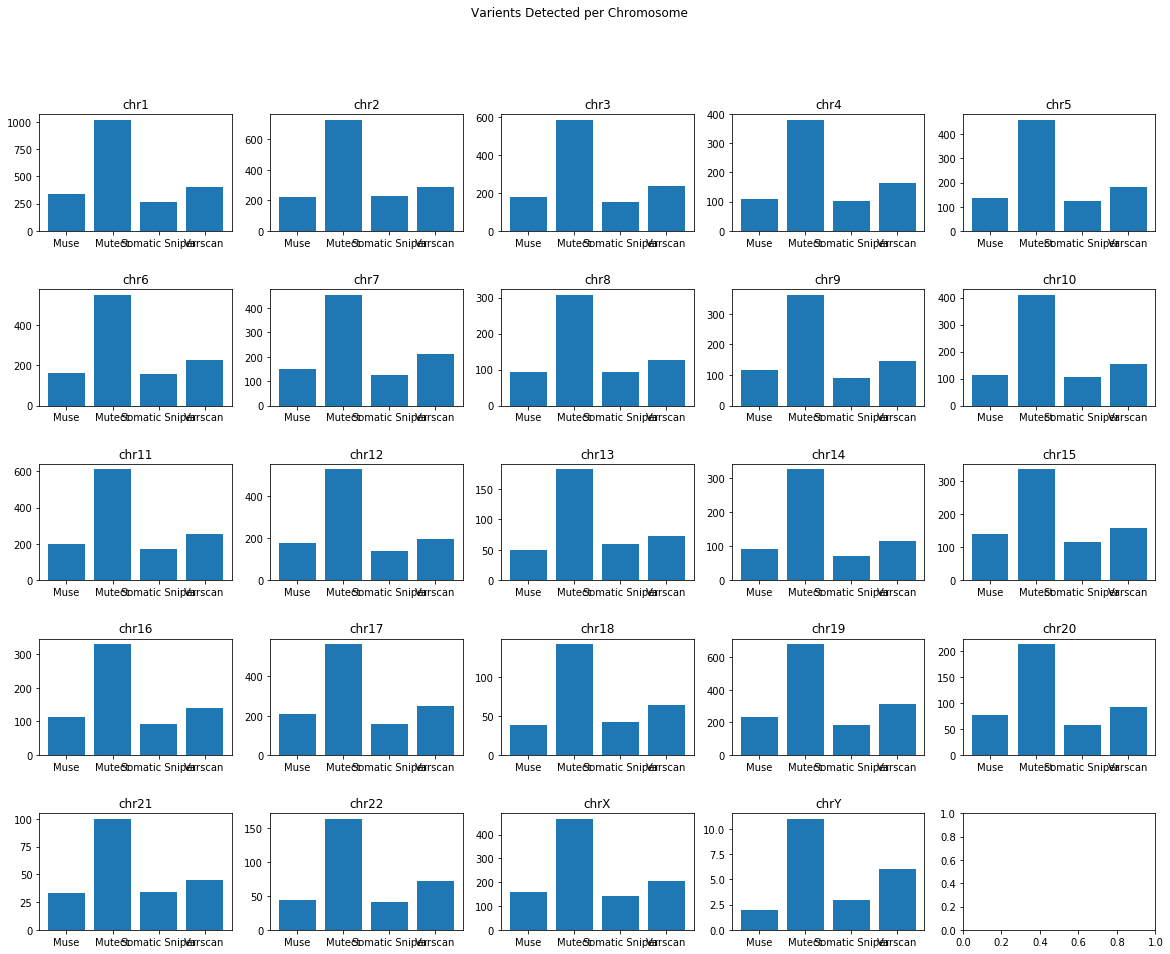

In [24]:
pipelines = ["Muse", "Mutect", "Somatic Sniper", "Varscan"]
fig, axs = plt.subplots(5, 5, figsize=(20, 15), sharey=False)
y_pos = np.arange(len(pipelines))

for i, chromosome in enumerate(tqdm(chromosomes)):
    axs[int(i/5),i%5].bar(pipelines, chromosome_count[chromosome])
    axs[int(i/5),i%5].set_title(chromosome)



fig.subplots_adjust(hspace=.5)
fig.suptitle('Varients Detected per Chromosome')

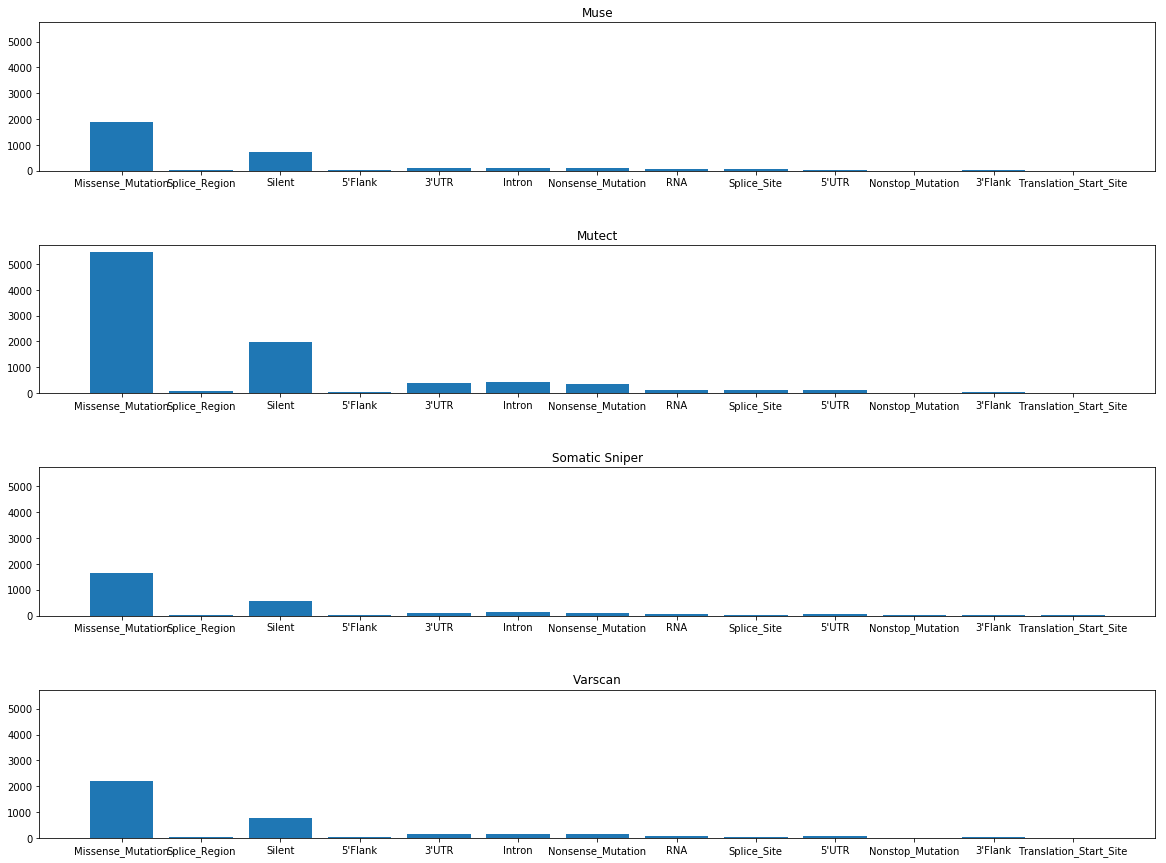

In [25]:
mutation_flavors = dataframes[0]['Variant_Classification'].unique()
fig, axs = plt.subplots(4, 1, figsize=(20, 15), sharey=True)
for i, dataframe in enumerate(dataframes):    
    mutation_types = []
    for mut in mutation_flavors:
        mutation_types.append(dataframe[dataframe['Variant_Classification'] == mut].shape[0])
    axs[i].bar(mutation_flavors, mutation_types)
    axs[i].set_title(pipelines[i])
fig.subplots_adjust(hspace=.5)

Remove non-Missense mutations from the dataset

In [26]:
muse_df = muse_df[muse_df['Variant_Classification'] == "Missense_Mutation"]
mutect_df = mutect_df[mutect_df['Variant_Classification'] == "Missense_Mutation"]
somaticsniper_df = somaticsniper_df[somaticsniper_df['Variant_Classification'] == "Missense_Mutation"]
varscan_df = varscan_df[varscan_df['Variant_Classification'] == "Missense_Mutation"]

make a dataframe for each Hugo symbol

In [27]:
gene_frames = {}
for gene in mutect_df["Entrez_Gene_Id"].unique():
    gene_frames[gene] = mutect_df[mutect_df["Entrez_Gene_Id"] == gene]

In [28]:
gene_counts = {}
for i in range(50):
    gene_counts[i] = 0

In [29]:
for gene in list(gene_frames.keys()):
    gene_counts[gene_frames[gene].shape[0]] += 1 

In [30]:
gene_counts

{0: 0,
 1: 3285,
 2: 641,
 3: 137,
 4: 44,
 5: 16,
 6: 10,
 7: 5,
 8: 2,
 9: 3,
 10: 0,
 11: 1,
 12: 0,
 13: 0,
 14: 0,
 15: 1,
 16: 0,
 17: 1,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 1,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 1,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0}

<BarContainer object of 50 artists>

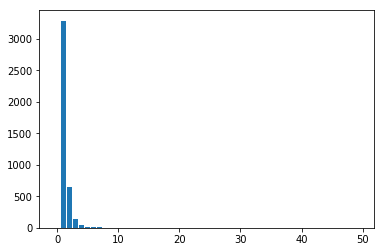

In [31]:
plt.bar(list(gene_counts.keys()), list(gene_counts.values()))

Set thresholds to determine the correct number of occurences a mutation must have in the dataset to be significant  
For exploratory purposes, I am setting it to mutations that occur in at least 5 different patients

In [79]:
Filtered_Genes = {}
threshold = 5
for gene in list(gene_frames.keys()):
    if gene!= 0 and gene_frames[gene].shape[0] > threshold:
        Filtered_Genes[gene] = gene_frames[gene]
        

In [80]:
Filtered_Genes.keys()

dict_keys([59269, 94025, 2322, 3417, 3418, 4893, 202333, 3845, 114788, 140453, 3815, 53353, 23013, 23077, 861, 23345, 79026, 27445, 7273, 23352, 113146, 4703, 1788, 7157])

In [82]:
Filtered_Genes[2322]

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
34,FLT3,2322,BI,GRCh38,chr13,28018505,28018505,+,Missense_Mutation,SNP,...,alt_allele_in_normal,GATATCTCGAG,c29fce54-7ec7-4f91-8925-3781d0bb25b3,c54e3ea6-6af2-458b-9dce-d8002be25fbd,da982c6a-c6c4-4c78-b630-c4a96e5a194f,c887d68c-da8e-4f15-a524-3b6674b145ed,wga_pair,COSM783,False,Valid
2032,FLT3,2322,BI,GRCh38,chr13,28018505,28018505,+,Missense_Mutation,SNP,...,alt_allele_in_normal,GATATCTCGAG,805e23ba-f6ea-4119-a0fa-caf2fedd99b0,054e61b7-518a-455a-ad37-28a72b43121e,918e294b-53e3-4c27-8494-c0eac069e4b9,27bb612c-a74a-4088-b0ea-1dbe28e7a725,wga_pair,COSM783,False,Valid
2072,FLT3,2322,BI,GRCh38,chr13,28034083,28034083,+,Missense_Mutation,SNP,...,PASS,TTACCAAACTC,260b693c-6f75-4581-abc0-ac8ba7d4c70d,4fbdfa53-df0a-41d1-877c-307ba5171c6f,cf3f5d2d-c48d-485c-9982-4da742e44e44,137dfe0a-2a2b-423c-9a8a-78233b6ead74,wga_pair,COSM1317926,True,Unknown
4494,FLT3,2322,BI,GRCh38,chr13,28018485,28018485,+,Missense_Mutation,SNP,...,PASS,ACATAGTTGGA,d74aa050-bf14-4a28-a184-1bf7a39bbe18,891daf58-4661-4a39-acd2-338c854c9658,3d7e4dab-abcc-4709-a755-74f45150b534,b147ea90-5643-4680-ac90-d6e8f7166792,wga_pair,COSM19639,True,Unknown
4554,FLT3,2322,BI,GRCh38,chr13,28034148,28034148,+,Missense_Mutation,SNP,...,PASS,AACGTAGAAGT,6382ffa4-8870-47e9-b239-491ad0a62375,1f5072fd-bd8f-4f9d-b934-8a141f24409a,e5757d73-6539-4c90-99df-2202220a1c62,87b2e470-fff6-4429-b77b-0552a1856337,wga_pair,NaN,False,Unknown
4708,FLT3,2322,BI,GRCh38,chr13,28018503,28018503,+,Missense_Mutation,SNP,...,alt_allele_in_normal,ATGATATCTCG,4a60c43a-c4cb-412b-920c-aaaab5a5c976,b4b78cd2-2106-476b-8893-79951270638e,95f26287-7f39-4c43-b3bc-bb7b07b7034d,99703a58-0a57-4889-88d2-13e59f84debe,wga_pair,COSM787,False,Valid
5828,FLT3,2322,BI,GRCh38,chr13,28018505,28018505,+,Missense_Mutation,SNP,...,alt_allele_in_normal,GATATCTCGAG,66a07285-32ac-4177-8121-86af28cfd352,aa56b905-7ad6-4062-8b66-6b4df6699343,83225c2f-66a0-4547-9627-2bdf8368178d,9dbd2ef7-77da-42ef-90d2-8d30b4330f94,wga_pair,COSM783,False,Valid
5957,FLT3,2322,BI,GRCh38,chr13,28018492,28018492,+,Missense_Mutation,SNP,...,alt_allele_in_normal,TGGAATCACTC,2c0117f8-9b31-4d87-883c-a50e23281a3e,4af39a25-abcd-432f-af73-a8aff123fab4,29a5a1f0-f76a-4aee-9e69-44608ec8d3e6,96b43e99-d81e-44d2-aac5-a6eb92727368,wga_pair,COSM1166729,False,Valid
6434,FLT3,2322,WUGSC,GRCh38,chr13,28018503,28018503,+,Missense_Mutation,SNP,...,PASS,ATGATATCTCG,5718e0a9-f6e4-4e3c-8f86-1380fab0f02b,00e8683a-ac54-4fbf-ac9d-a9c53b77aa48,4ed494e8-5290-4b7b-a747-a7d62b6218a7,e591adad-8331-4198-94c4-d03ea01f70c5,wga_pair,COSM788,True,Valid
6549,FLT3,2322,BI,GRCh38,chr13,28034171,28034171,+,Missense_Mutation,SNP,...,PASS,AGGAGCCGGTC,91d04c81-d494-4d67-a0a1-c3a0f42beb97,7cdd0ce9-fef3-4ee2-98ac-5c0e08e5c949,72f50ab9-642d-4b4e-8171-4c3303f5b461,11ed5289-050e-434a-a24e-79854b0d9dcc,wga_pair,NaN,False,Unknown


In [83]:
#https://www.biostars.org/p/163745/
import requests

mapping_url = 'http://www.uniprot.org/mapping/'
mapping_params = {
    'from': 'P_ENTREZGENEID',
    'to': 'ACC',
    'format': 'tab',
    'query': '3845 88',
}

uniprot_url = 'http://www.uniprot.org/uniprot/'
query_string = 'yourlist:{} AND reviewed:yes'
search_params = {
    'columns': 'id',
    'format': 'tab',
    'query': query_string,
}

def get_job_number():
    response = requests.get(mapping_url, params=mapping_params,
                            allow_redirects=False)
    return response.headers['location'].split('/')[-1].split('.')[0]

def get_filtered_uniprot_ids():
    job_num = get_job_number()
    search_params['query'] = query_string.format(job_num)
    response = requests.get(uniprot_url, search_params)
    return response.text

In [36]:
Uniprot = get_filtered_uniprot_ids()
Uniprot

''

In [38]:
#https://www.uniprot.org/help/api_idmapping
import urllib.parse
import urllib.request

url = 'https://www.uniprot.org/uploadlists/'

params = {
'from':'P_ENTREZGENEID',
'to':'ID',
'format':'tab',
'query':'3845 94025'
}

data = urllib.parse.urlencode(params)
request = urllib.request.Request(url, data.encode("utf-8"))
contact = "aamleshi@uchicago.edu" # Please set a contact email address here to help us debug in case of problems (see https://www.uniprot.org/help/privacy).
request.add_header('User-Agent', 'Python %s' % contact)
response = urllib.request.urlopen(request)
page = response.read(200000)

In [49]:
page = page.decode("utf-8")

In [50]:
type(page)

str

In [52]:
print(page)

From	To
3845	A0A024RAV5_HUMAN
3845	I1SRC5_HUMAN
3845	L7RSL8_HUMAN
3845	RASK_HUMAN
94025	B3KY81_HUMAN
94025	MUC16_HUMAN



In [68]:
def convert_entrez(Entrez, split = True):
    """Returns the first Uniprot named structure for a entrez gene id"""
    url = 'https://www.uniprot.org/uploadlists/'

    params = {
    'from':'P_ENTREZGENEID',
    'to':'ID',
    'format':'tab',
    'query':Entrez
    }

    data = urllib.parse.urlencode(params)
    request = urllib.request.Request(url, data.encode("utf-8"))
    contact = "aa@uchicago.edu" # Please set a contact email address here to help us debug in case of problems (see https://www.uniprot.org/help/privacy).
    request.add_header('User-Agent', 'Python %s' % contact)
    response = urllib.request.urlopen(request)
    page = response.read(200000)
    page = page.decode("utf-8")
    if split:
        try:
            return page.split('\n')[1].split('\t')[1]
        except:
            return page
    else:
        return page

In [ ]:
convert_entrez("123")

In [85]:
Filtered_Genes_Mapped = {}
for key in tqdm(list(Filtered_Genes.keys())):
    Filtered_Genes_Mapped[convert_entrez(key)] = Filtered_Genes[key]

100%|██████████| 24/24 [00:33<00:00,  1.42s/it]


In [86]:
Filtered_Genes_Mapped

{'A0A024RAV5_HUMAN':      Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  Start_Position  \
 122         KRAS            3845     BI     GRCh38      chr12        25245350   
 131         KRAS            3845     BI     GRCh38      chr12        25245350   
 848         KRAS            3845     BI     GRCh38      chr12        25227341   
 4243        KRAS            3845     BI     GRCh38      chr12        25245347   
 4334        KRAS            3845     BI     GRCh38      chr12        25245277   
 5880        KRAS            3845     BI     GRCh38      chr12        25245350   
 9695        KRAS            3845     BI     GRCh38      chr12        25227348   
 
       End_Position Strand Variant_Classification Variant_Type  \
 122       25245350      +      Missense_Mutation          SNP   
 131       25245350      +      Missense_Mutation          SNP   
 848       25227341      +      Missense_Mutation          SNP   
 4243      25245347      +      Missense_Mutation         

In [87]:
pdb_path = dirName + "PDB_files"

In [89]:
pdbl = PDBList()
pdbl.retrieve_pdb_file("1FAT")

NameError: name 'PDBList' is not defined